## Demonstration of Dimensionality Reduction and Denoising by the SVD

This jupyter notebook is part of a [collection of notebooks](../index.ipynb) on various topics of Digital Signal Processing. Please direct questions and suggestions to [Sascha.Spors@uni-rostock.de](mailto:Sascha.Spors@uni-rostock.de).

This notebook demonstrates the use of the [Singular Value Decomposition (SVD)](https://en.wikipedia.org/wiki/Singular_value_decomposition) to explore the latent dimensions, perform visualization and denoising of a high-dimensional dataset.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Generate Dataset

In the following, a synthetic dataset with $N$ examples is generated by exploiting a simple linear relationship and additive noise which is mapped into a $F$-dimensional feature space.

In [2]:
N = 200  # total number of examples
F = 32  # dimensionality of feature space


def generate_dataset(N, F):

    # generate examples with linear relationship
    np.random.seed(3)
    x = np.linspace(-10, 10, N)
    y = .4 * x + np.random.normal(size=N)
    Xraw = np.array([x, y]).T

    # map low-dimensional samples into feature space
    A = np.random.uniform(low=-2, high=2, size=(2, F))
    A = A * np.random.choice([0, 1], size=(2, F), p=[2./10, 8./10])
    X = np.dot(Xraw, A)

    return X

X = generate_dataset(N, F)

The data is visualized by plotting the datapoints in subsets of the high-dimensional dataset. It should become obvious that it is hard to observe the intrinsic structure of the dataset this way.

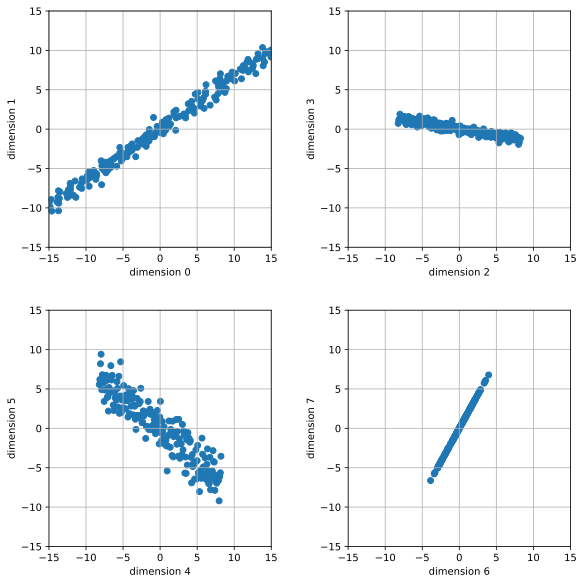

In [3]:
def plot_data_subdimensions(X, vmax=15, vmin=-15):

    fig = plt.figure(figsize=(8, 8), constrained_layout=True)
    gs = fig.add_gridspec(2, 2, wspace=.1, hspace=.1)

    for n in range(4):
        ax = plt.subplot(gs[n])
        ax.scatter(X[:, 2*n], X[:, 2*n+1])
        ax.set_xlabel('dimension {}'.format(2*n))
        ax.set_ylabel('dimension {}'.format(2*n+1))
        ax.axis([vmin, vmax, vmin, vmax])
        ax.grid()

plot_data_subdimensions(X)

### Dimensionality Reduction and Latent Space Exploration by the SVD

The SVD of the data matrix $\mathbf{X} = \mathbf{U} \, \mathbf{S} \, \mathbf{V}^T$ is computed in order to explore the latent dimensions of the dataset

In [4]:
U, S, Vt = np.linalg.svd(X)

In order to determine the dimensionality $K$ of the latent space, the eigenvalues $\sigma_r$ are plotted in a [scree plot](https://en.wikipedia.org/wiki/Scree_plot)

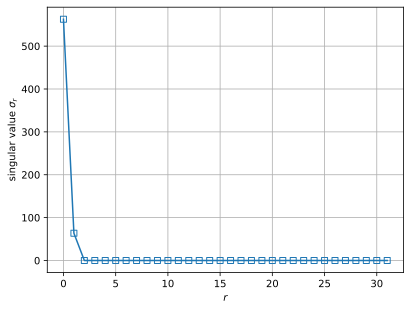

In [5]:
def scree_plot(S):
    '''Plots a scree plot of the eigenvalues.'''
    line, = plt.plot(S, marker='s', markerfacecolor='none')
    plt.xlabel(r'$r$')
    plt.ylabel(r'singular value $\sigma_r$')
    plt.grid()
    
    return line


scree_plot(S)

It can be observed that the first singular value $\sigma_0$ is large, followed by a significantly lower value of the second singular value $\sigma_1$. The remaining singular values are zero. Hence it can be concluded that the intrinsic dimensionality of the data is $K=2$. As alternative to the scree plot, the ratio of energy captured by the first $K$ latent dimensions is computed and plotted. The results also confirm the former conclusion.

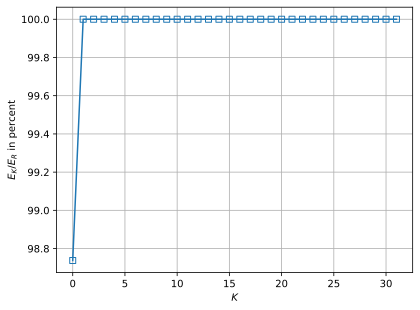

In [6]:
def captured_energy_plot(S):
    '''Plots the normalized cumulative captured energy.'''
    E = np.cumsum(S**2)

    plt.plot(100 * E/E[-1], marker='s', markerfacecolor='none')
    plt.xlabel(r'$K$')
    plt.ylabel(r'$E_K / E_R$ in percent')
    plt.grid()


captured_energy_plot(S)

We now may use the right eigenvectors of the SVD to project the data into its latent dimensions. The linear relationship with additive noise now becomes evident in the first two dimensions, the higher dimensions do not contribute.

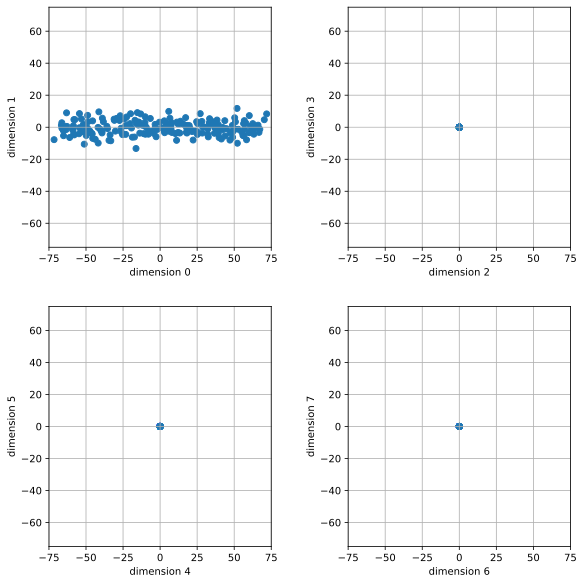

In [7]:
Xv = np.dot(X, Vt.T)

plot_data_subdimensions(Xv, vmax=75, vmin=-75)

### Denoising by the SVD

Denoising a dataset by the SVD is performed by removing dimensions which many represent noise preserving only the latent dimensions of the data. In order to illustrate the effect of additive Gaussian noise on the singular values noise with different Signal-to-Noise ratios (SNR) is added. The scree plot illustrates the effects. Until a certain SNR level, the latent dimensions of the data can be still be identified by observing the kink in the eigenvalue decay.

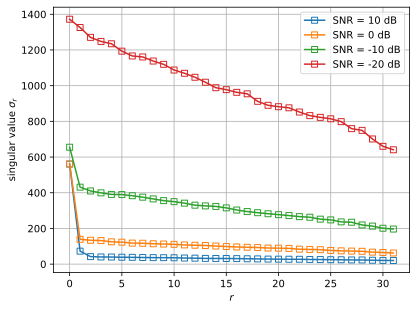

In [8]:
def additive_gaussian_noise(X, SNR):
    '''Adds gaussian (normal) distributed noise to dataset.'''
    sigma_x = np.var(X)
    sigma_n = sigma_x * 10**(- SNR/10)
    X_wn = X + np.sqrt(sigma_n) * np.random.normal(size=X.shape)
    
    return X_wn


for SNR in [10, 0, -10, -20]:
    Xn = additive_gaussian_noise(X, SNR)
    U, S, Vt = np.linalg.svd(Xn)
    line = scree_plot(S)
    line.set_label('SNR = {} dB'.format(SNR))

plt.legend()
plt.grid()

In order to illustrates the effect of noise on the dataset, subsets of the high-dimensional dataset are illustrated for an SNR of 0 dB. Comparison with the noise free case above reveals the effect of noise.

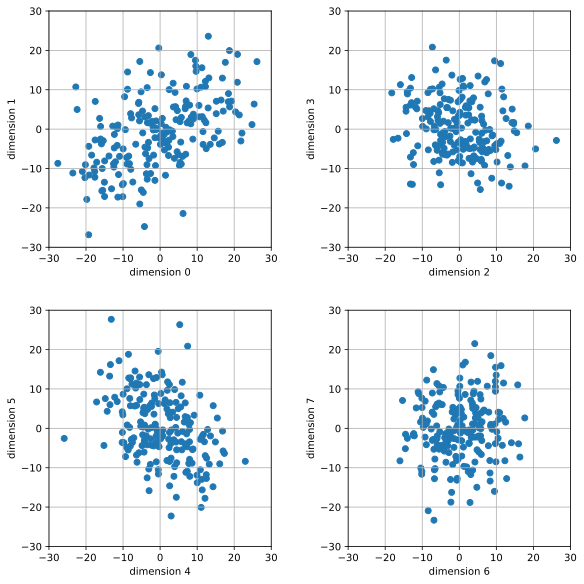

In [9]:
Xn = additive_gaussian_noise(X, 0)
U, S, Vt = np.linalg.svd(Xn)

plot_data_subdimensions(Xn, vmin=-30, vmax=30)

Now the noise is removed by reconstructing the data using a truncated spectral decomposition for $K=2$. Comparison with the noisy data above and noise free case further above reveals the effect of denoising.

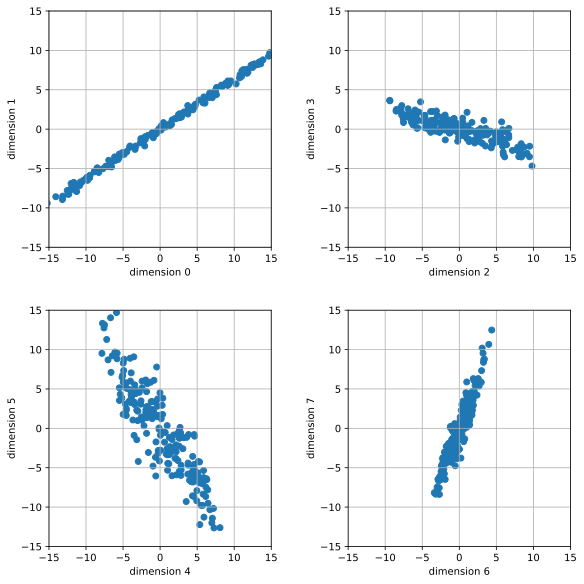

In [10]:
def truncated_spectral_decomposition(X, U, S, Vt, K):

    Xr = np.zeros_like(X)
    for r in range(K):
        Xr += S[r] * np.dot(np.expand_dims(U[:,r], axis=1),np.expand_dims(Vt[r,:], axis=0))
        
    return Xr

Xr = truncated_spectral_decomposition(Xn, U, S, Vt, 2)
plot_data_subdimensions(Xr)

**Copyright**

This notebook is provided as [Open Educational Resource](https://de.wikipedia.org/wiki/Open_Educational_Resources).
The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/)
, the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: Sascha Spors, Data driven audio signal processing - Lecture supplementals.